# Docking

Analysis of flexible docking calculations with GNINA with the Vina scoring function.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

## Data

In [2]:
rmsd_file = "../carlos_cd/rmsds.csv"

In [3]:
df = pd.read_csv(rmsd_file)
df

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
0,AA2AR,3EML,3QAK,0,2.22358,2.223580,0.64089,0.640886,1.09735,-9.13664
1,AA2AR,3EML,3QAK,10,3.25554,3.255540,1.92520,1.925200,3.30490,-12.32127
2,AA2AR,3EML,3QAK,11,2.51549,2.515490,2.09211,2.092110,3.74144,-12.21410
3,AA2AR,3EML,3QAK,12,6.50215,6.502150,1.49297,1.492970,3.03461,-12.17950
4,AA2AR,3EML,3QAK,13,10.29577,10.295800,1.20995,1.209950,2.57418,-12.05803
...,...,...,...,...,...,...,...,...,...,...
107256,XIAP,5C83,5C3K,0,0.64921,0.649212,0.87489,0.874893,1.61106,-6.30846
107257,XIAP,5C83,5C7B,0,0.65275,0.652747,0.30845,0.308446,0.44257,-6.27960
107258,XIAP,5C84,1TFQ,0,1.62995,1.629950,0.89805,0.898053,1.63567,-7.18336
107259,XIAP,5C84,4HY0,0,1.28057,1.280570,0.40234,0.402339,0.59178,-6.82557


In [4]:
# Get tuples from [pocket, ligand, protein] and count unique tuples
# Check that the number of unique tuples equals the total number protein-ligand pairs
allsystems = pd.unique(df[["pocket", "ligand", "protein"]].apply(tuple,axis="columns"))
assert len(allsystems) == 7970

In [5]:
df_clean = df.dropna()
systems = pd.unique(df_clean[["pocket", "ligand", "protein"]].apply(tuple,axis="columns"))
len(systems)

7921

In [6]:
diff = set(allsystems) - set(systems)
diff

{('ACES', '1ACJ', '1JJB'),
 ('ACES', '1ZGB', '1JJB'),
 ('ACES', '2CMF', '1JJB'),
 ('CDK2', '3IG7', '3QQJ'),
 ('FA10', '2FZZ', '2XBV'),
 ('FA10', '2RA0', '1IQE'),
 ('FA10', '2Y82', '2XBV'),
 ('FA10', '3KQB', '1IQE'),
 ('HIVPR', '3O9H', '1W5V'),
 ('IGF1R', '1JQH', '5FXR'),
 ('IGF1R', '2OJ9', '5FXR'),
 ('IGF1R', '2ZM3', '5FXR'),
 ('IGF1R', '3LVP', '5FXR'),
 ('IGF1R', '3NW6', '5FXR'),
 ('IGF1R', '3NW7', '5FXR'),
 ('JAK2', '4D0W', '4F08'),
 ('JAK2', '4E4M', '4F08'),
 ('JAK2', '5CF6', '4F08'),
 ('KIF11', '1X88', '4BXN'),
 ('KIF11', '2IEH', '4BXN'),
 ('KIF11', '2X7D', '4BXN'),
 ('KIF11', '3K3B', '4BXN'),
 ('MK01', '4FV2', '4GSB'),
 ('MK01', '4ZZM', '4GSB'),
 ('MK01', '5LCJ', '4GSB'),
 ('MK01', '5NHV', '4GSB'),
 ('MK10', '2G01', '1UKI'),
 ('MK10', '3ELJ', '1UKI'),
 ('MK10', '3RTP', '1UKI'),
 ('MK10', '4L7F', '4HYS'),
 ('NRAM', '1A4G', '1B9V'),
 ('NRAM', '1A4G', '1VCJ'),
 ('NRAM', '1A4Q', '1B9V'),
 ('NRAM', '1A4Q', '1VCJ'),
 ('NRAM', '1B9S', '1B9V'),
 ('NRAM', '1B9T', '1B9V'),
 ('NRAM', '1INF',

In [7]:
def show_system(t):
    return df[(df.pocket == t[0]) & (df.ligand == t[1]) & (df.protein == t[2])]

In [8]:
show_system(('CDK2', '3IG7', '3QQJ'))

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
29482,CDK2,3QQJ,3IG7,0,2.48215,2.48215,NaN,NaN,-1.0,-8.0795


In [9]:
# flexobrmsd is non-null while flexrmsd is NaN
# For some (large) systems, spyrmsd process is killed after a while...
# Use flexobrmsd only
show_system(('NRAM', '1A4G', '1B9V'))

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
104495,NRAM,1B9V,1A4G,0,0.79267,0.792673,NaN,0.681253,1.25573,-7.91753


In [21]:
# Cleanup further by removing the flexrmsd colum
# It contains some spurious NaNs since spyrmsd sometimes gets killed (for very large systems)
# Using only obrms result for flexible side chain RMSD we get the same systems than
# in the GNINA 1.0 paper, as it should be.
df_clean = df.drop(columns=["flexrmsd"]).dropna()
systems = pd.unique(df_clean[["pocket", "ligand", "protein"]].apply(tuple,axis="columns"))
diff = set(allsystems) - set(systems)
diff

{('ACES', '1ACJ', '1JJB'),
 ('ACES', '1ZGB', '1JJB'),
 ('ACES', '2CMF', '1JJB'),
 ('CDK2', '3IG7', '3QQJ'),
 ('IGF1R', '1JQH', '5FXR'),
 ('IGF1R', '2OJ9', '5FXR'),
 ('IGF1R', '2ZM3', '5FXR'),
 ('IGF1R', '3LVP', '5FXR'),
 ('IGF1R', '3NW6', '5FXR'),
 ('IGF1R', '3NW7', '5FXR'),
 ('JAK2', '4D0W', '4F08'),
 ('JAK2', '4E4M', '4F08'),
 ('JAK2', '5CF6', '4F08'),
 ('MK01', '4FV2', '4GSB'),
 ('MK01', '4ZZM', '4GSB'),
 ('MK01', '5LCJ', '4GSB'),
 ('MK01', '5NHV', '4GSB'),
 ('MK10', '2G01', '1UKI'),
 ('MK10', '3ELJ', '1UKI'),
 ('MK10', '3RTP', '1UKI'),
 ('MK10', '4L7F', '4HYS'),
 ('SRC', '3DQX', '3UQG'),
 ('SRC', '5D10', '3UQG'),
 ('SRC', '5J5S', '3UQG')}

In [22]:
# System discarded from the GNINA1.0 because of broken bonds
# flexobrmsd is inf (while)
show_system(("KIF11","3K3B","4BXN"))

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
87501,KIF11,4BXN,3K3B,0,2.37879,2.37879,NaN,inf,1.82213,-10.83730
87502,KIF11,4BXN,3K3B,10,2.60657,2.60657,NaN,inf,3.69682,-11.24199
87503,KIF11,4BXN,3K3B,11,6.76467,6.76467,NaN,inf,4.58410,-11.13477
87504,KIF11,4BXN,3K3B,12,4.63203,4.63203,NaN,inf,4.06148,-11.12297
87505,KIF11,4BXN,3K3B,13,8.18852,8.18852,NaN,inf,4.54174,-11.09078
87506,KIF11,4BXN,3K3B,14,8.14728,8.14728,NaN,inf,4.17728,-11.08464
87507,KIF11,4BXN,3K3B,15,4.39169,4.39169,NaN,inf,2.10791,-11.02752
87508,KIF11,4BXN,3K3B,16,3.43046,3.43046,NaN,inf,3.25350,-10.98312
87509,KIF11,4BXN,3K3B,17,2.59429,2.59429,NaN,inf,4.53968,-10.97631
87510,KIF11,4BXN,3K3B,18,1.88421,1.88421,NaN,inf,3.83731,-10.90196


In [23]:
set(pd.unique(df_clean.loc[df_clean.flexobrmsd == np.inf, ["pocket", "ligand", "protein"]].apply(tuple, axis="columns")))

{('FA10', '2FZZ', '2XBV'),
 ('FA10', '2RA0', '1IQE'),
 ('FA10', '2Y82', '2XBV'),
 ('FA10', '3KQB', '1IQE'),
 ('GCR', '3CLD', '3MNP'),
 ('KIF11', '1X88', '4BXN'),
 ('KIF11', '2IEH', '4BXN'),
 ('KIF11', '2X7D', '4BXN'),
 ('KIF11', '3K3B', '4BXN'),
 ('LKHA4', '3FTZ', '4RSY'),
 ('LKHA4', '3FUJ', '3FHE')}

In [24]:
show_system(('LKHA4', '3FTZ', '4RSY'))

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
92027,LKHA4,4RSY,3FTZ,0,1.68614,1.68614,0.49637,0.496365,1.01297,-8.71039
92028,LKHA4,4RSY,3FTZ,10,11.97979,11.97980,0.74419,0.744189,1.61944,-7.77810
92029,LKHA4,4RSY,3FTZ,11,12.63956,12.63960,1.11889,1.118890,2.05031,-7.66921
92030,LKHA4,4RSY,3FTZ,12,3.71326,3.71326,1.31846,1.318460,2.35987,-7.56609
92031,LKHA4,4RSY,3FTZ,13,11.92906,11.92910,1.44852,1.448520,3.62848,-7.53659
92032,LKHA4,4RSY,3FTZ,14,8.52689,8.52689,1.62244,1.622440,3.97964,-7.37997
92033,LKHA4,4RSY,3FTZ,15,12.45410,12.45410,2.07581,2.075810,4.26871,-7.21098
92034,LKHA4,4RSY,3FTZ,16,11.95076,11.95080,1.57962,1.579620,3.50173,-7.00318
92035,LKHA4,4RSY,3FTZ,17,9.71048,9.71048,1.12656,1.126560,2.14328,-6.99093
92036,LKHA4,4RSY,3FTZ,18,11.86113,11.86110,1.07223,1.072230,1.81974,-6.93236


In [25]:
show_system(('GCR', '3CLD', '3MNP'))

,pocket,protein,ligand,rank,rmsd,obrmsd,flexrmsd,flexobrmsd,fmaxrmsd,score
59712,GCR,3MNP,3CLD,0,3.30902,3.30902,NaN,inf,1.52745,60.54287
59713,GCR,3MNP,3CLD,10,8.61341,8.61341,1.34182,1.34182,3.00091,-6.13747
59714,GCR,3MNP,3CLD,11,5.25370,5.25370,1.78065,1.78065,3.16296,-5.64548
59715,GCR,3MNP,3CLD,12,8.18082,8.18082,1.80023,1.80023,2.93109,-5.61286
59716,GCR,3MNP,3CLD,13,5.22363,5.22363,2.42224,2.42224,4.43547,-5.60957
59717,GCR,3MNP,3CLD,14,7.69302,7.69302,1.60935,1.60935,2.92694,-5.47027
59718,GCR,3MNP,3CLD,15,5.32215,5.32215,2.39586,2.39586,4.93163,-5.28450
59719,GCR,3MNP,3CLD,16,12.40384,12.40380,2.71086,2.71086,5.21848,-4.50137
59720,GCR,3MNP,3CLD,17,13.36832,13.36830,2.91176,2.91176,5.20457,-3.98779
59721,GCR,3MNP,3CLD,18,8.26367,8.26367,2.73246,2.73246,4.84707,-3.92244


In [26]:
# Remove all infinity values
# They are caused by different connectivity between the crystal structure and the output
# - Broken spurious bond in the crystal
# - Added spurious bond in the output (some poses only)
# - Broken disulfide bond
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.dropna(inplace=True)

In [27]:
systems = pd.unique(df_clean[["pocket", "ligand", "protein"]].apply(tuple,axis="columns"))
len(systems)

7938

In [28]:
# 24 systems without flexible bonds
# 4 systems with broken disulfide bonds (broken in all poses)
# 4 systems with spurious bond in crystal (broken in all poses)
# The 3 semaining systems with spurious bond added, show this problem only
# for some poses therefore they are not completely removed
assert len(systems) == 7970 - 24 - 8

In [29]:
df_clean.to_csv("rmsd_clean.csv", float_format="%.5f", index=False)

## `obrms` vs `spyrmsd`

<AxesSubplot:xlabel='rmsd', ylabel='obrmsd'>

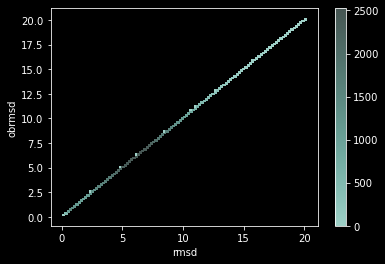

In [30]:
sns.histplot(
    df_clean, x="rmsd", y="obrmsd",
    cbar=True
)

In [31]:
max(df_clean["rmsd"] - df_clean["obrmsd"])

5.000000000165983e-05